In [77]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [78]:
CSV_SUPERFICIES = "superficie_estrellas.csv"
CSV_MUESTRAS = "muestras_amigos.csv"

In [79]:
df_superficies = pd.read_csv(CSV_SUPERFICIES)
df_muestras = pd.read_csv(CSV_MUESTRAS)

In [80]:
MEDIA = df_superficies["superficie"].mean()
DESVIO = df_superficies["superficie"].std()
MEDIA, DESVIO

(np.float64(18.83), np.float64(14.214841440259445))

In [81]:
df_muestras = df_muestras.merge(df_superficies, on="estrella", how="left")

In [82]:
df_superficies["muestra"] = "original"

In [83]:
df_total = pd.concat([df_superficies, df_muestras], ignore_index=True)
df_total

,estrella,superficie,muestra
0,1,8,original
1,2,5,original
2,3,8,original
3,4,32,original
4,5,21,original
...,...,...,...
125,34,6,Mati
126,12,5,Mati
127,54,24,Mati
128,24,5,Mati


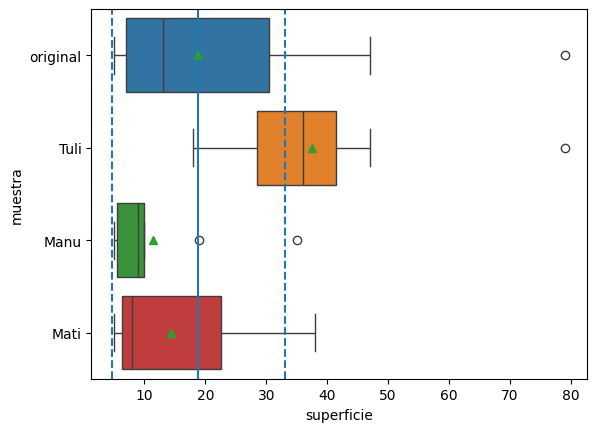

In [84]:
plt.figure()

sns.boxplot(data=df_total, x="superficie", y="muestra", hue="muestra", orient="h", showmeans=True)

# lineas de comparación
plt.axvline(MEDIA)
plt.axvline(MEDIA - DESVIO, linestyle="--")
plt.axvline(MEDIA + DESVIO, linestyle="--")

plt.show()

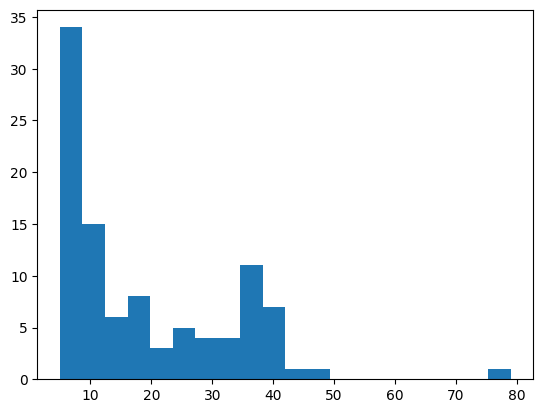

In [85]:
plt.figure()
plt.hist(df_superficies["superficie"], bins=20)
plt.show()

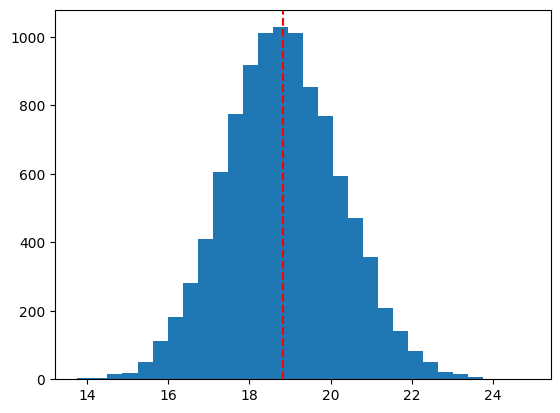

In [90]:
datos = df_superficies["superficie"]

n_boot = 10000
medias_boot = []

for _ in range(n_boot):
    muestra = np.random.choice(datos, size=len(datos), replace=True)
    medias_boot.append(muestra.mean())

medias_boot = np.array(medias_boot)

plt.figure()
plt.hist(medias_boot, bins=30)
plt.axvline(MEDIA, linestyle="--", color="red")
plt.show()

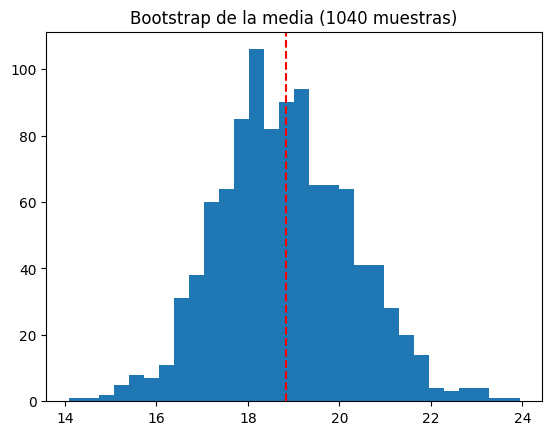

In [ ]:
from matplotlib.animation import FuncAnimation, PillowWriter

datos = df_superficies["superficie"]

medias_boot = []

fig, ax = plt.subplots()

def update(frame):
    ax.clear()
    
    for _ in range(20):
        muestra = np.random.choice(datos, size=len(datos), replace=True)
        medias_boot.append(muestra.mean())
    
    ax.hist(medias_boot, bins=30)
    ax.axvline(MEDIA, linestyle="--", color="red")
    ax.set_title(f"Bootstrap de la media ({len(medias_boot)} muestras)")

ani = FuncAnimation(fig, update, frames=50)

ani.save("images/bootstrap.gif", writer=PillowWriter(fps=5))